In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
restaurant = pd.read_excel('Restaurant_List.xlsx')
restaurant.drop('website', axis=1, inplace=True)
restaurant.rename(columns={'type': 'category'}, inplace=True)
restaurant = restaurant.sort_values(by=['reviews_count', 'rating'], ascending=False)
restaurant

,name,category,address_full,latitude,longitude,rating,reviews_count
0,Food Junction Grand Pakuwon,Food court,"Food Junction Grand Pakuwon, Jalan Grand Banja...",-7.251022,112.662005,4.6,22566
1,Depot Bu Rudy Dharmahusada,Indonesian restaurant,"Depot Bu Rudy Dharmahusada, Jl. Dharmahusada N...",-7.267330,112.770110,4.5,14282
2,Zangrandi Ice Cream,Ice cream shop,"Zangrandi Ice Cream, Jl. Yos Sudarso No.15, Em...",-7.263414,112.746122,4.6,10119
3,G WALK,Food court,"G WALK, G Walk Citraland, Ruko Taman Gapura, J...",-7.291557,112.654565,4.6,9839
4,Sego Sambel Mak Yeye,Restaurant,"Sego Sambel Mak Yeye, Jl. Jagir Wonokromo Weta...",-7.301319,112.738037,4.3,9592
...,...,...,...,...,...,...,...
215,Wisata Kuliner Cak Basori,Diner,"Wisata Kuliner Cak Basori, 118, Sentra Kuliner...",-7.264283,112.697046,5.0,1
216,Sentra wisata kuliner kendung Semanggi berseri,Restaurant,PJVM+JXM Sentra wisata kuliner kendung Semangg...,-7.255909,112.634912,5.0,1
218,Kedai Me Me (Wisata Kuliner Sukomanunggal),Brunch restaurant,"Kedai Me Me (Wisata Kuliner Sukomanunggal), Wi...",-7.262247,112.697687,5.0,1
219,"WAKUNTUL [Wisata Kuliner Bentul, Surabaya]",Restaurant,"WAKUNTUL [Wisata Kuliner Bentul, Surabaya], Jl...",-7.305676,112.741868,5.0,1


In [10]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 0 to 217
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           220 non-null    object 
 1   category       220 non-null    object 
 2   address_full   220 non-null    object 
 3   latitude       220 non-null    float64
 4   longitude      220 non-null    float64
 5   rating         220 non-null    float64
 6   reviews_count  220 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 13.8+ KB


In [11]:
restaurant.isna().sum()

name             0
category         0
address_full     0
latitude         0
longitude        0
rating           0
reviews_count    0
dtype: int64

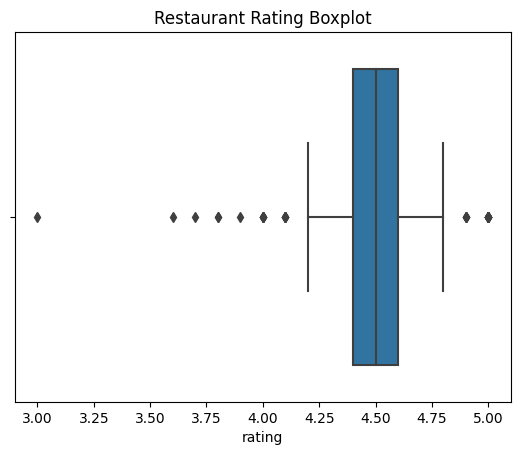

In [13]:
sns.boxplot(x=restaurant['rating'])
plt.title('Restaurant Rating Boxplot')
plt.show()


In [14]:
Q1 = restaurant['rating'].quantile(0.25)
Q3 = restaurant['rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_treshold = Q1 - 1.5 * IQR

restaurant = restaurant[restaurant['rating'] >= lower_bound_treshold]
restaurant

,name,category,address_full,latitude,longitude,rating,reviews_count
0,Food Junction Grand Pakuwon,Food court,"Food Junction Grand Pakuwon, Jalan Grand Banja...",-7.251022,112.662005,4.6,22566
1,Depot Bu Rudy Dharmahusada,Indonesian restaurant,"Depot Bu Rudy Dharmahusada, Jl. Dharmahusada N...",-7.267330,112.770110,4.5,14282
2,Zangrandi Ice Cream,Ice cream shop,"Zangrandi Ice Cream, Jl. Yos Sudarso No.15, Em...",-7.263414,112.746122,4.6,10119
3,G WALK,Food court,"G WALK, G Walk Citraland, Ruko Taman Gapura, J...",-7.291557,112.654565,4.6,9839
4,Sego Sambel Mak Yeye,Restaurant,"Sego Sambel Mak Yeye, Jl. Jagir Wonokromo Weta...",-7.301319,112.738037,4.3,9592
...,...,...,...,...,...,...,...
214,Wisata Kuliner Semanggi Surabaya,Diner,"Wisata Kuliner Semanggi Surabaya, Bozem, Wonor...",-7.307533,112.823428,5.0,1
215,Wisata Kuliner Cak Basori,Diner,"Wisata Kuliner Cak Basori, 118, Sentra Kuliner...",-7.264283,112.697046,5.0,1
216,Sentra wisata kuliner kendung Semanggi berseri,Restaurant,PJVM+JXM Sentra wisata kuliner kendung Semangg...,-7.255909,112.634912,5.0,1
218,Kedai Me Me (Wisata Kuliner Sukomanunggal),Brunch restaurant,"Kedai Me Me (Wisata Kuliner Sukomanunggal), Wi...",-7.262247,112.697687,5.0,1


In [15]:
restaurant.describe()

,latitude,longitude,rating,reviews_count
count,204.000000,204.000000,204.000000,204.000000
mean,-7.281698,112.731564,4.532843,1556.245098
std,0.026800,0.037330,0.196145,2830.187355
min,-7.343872,112.629421,4.200000,1.000000
25%,-7.295776,112.707347,4.400000,104.250000
50%,-7.280575,112.736570,4.500000,395.500000
75%,-7.262688,112.750634,4.600000,1613.500000
max,-7.204231,112.823428,5.000000,22566.000000


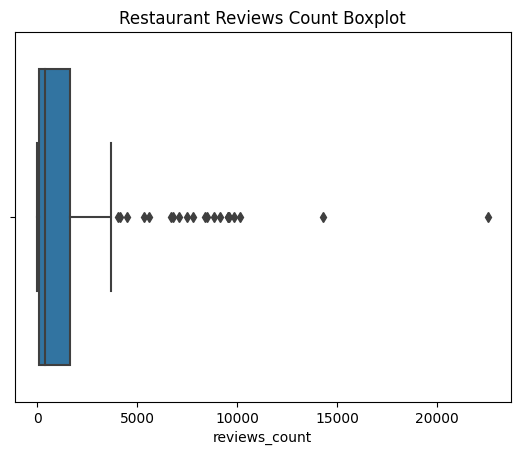

In [16]:
sns.boxplot(x=restaurant['reviews_count'])
plt.title('Restaurant Reviews Count Boxplot')
plt.show()

In [17]:
Q1 = restaurant['reviews_count'].quantile(0.25)
Q3 = restaurant['reviews_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_treshold = Q1 - 1.5 * IQR

restaurant = restaurant[restaurant['reviews_count'] >= lower_bound_treshold]
restaurant

,name,category,address_full,latitude,longitude,rating,reviews_count
0,Food Junction Grand Pakuwon,Food court,"Food Junction Grand Pakuwon, Jalan Grand Banja...",-7.251022,112.662005,4.6,22566
1,Depot Bu Rudy Dharmahusada,Indonesian restaurant,"Depot Bu Rudy Dharmahusada, Jl. Dharmahusada N...",-7.267330,112.770110,4.5,14282
2,Zangrandi Ice Cream,Ice cream shop,"Zangrandi Ice Cream, Jl. Yos Sudarso No.15, Em...",-7.263414,112.746122,4.6,10119
3,G WALK,Food court,"G WALK, G Walk Citraland, Ruko Taman Gapura, J...",-7.291557,112.654565,4.6,9839
4,Sego Sambel Mak Yeye,Restaurant,"Sego Sambel Mak Yeye, Jl. Jagir Wonokromo Weta...",-7.301319,112.738037,4.3,9592
...,...,...,...,...,...,...,...
214,Wisata Kuliner Semanggi Surabaya,Diner,"Wisata Kuliner Semanggi Surabaya, Bozem, Wonor...",-7.307533,112.823428,5.0,1
215,Wisata Kuliner Cak Basori,Diner,"Wisata Kuliner Cak Basori, 118, Sentra Kuliner...",-7.264283,112.697046,5.0,1
216,Sentra wisata kuliner kendung Semanggi berseri,Restaurant,PJVM+JXM Sentra wisata kuliner kendung Semangg...,-7.255909,112.634912,5.0,1
218,Kedai Me Me (Wisata Kuliner Sukomanunggal),Brunch restaurant,"Kedai Me Me (Wisata Kuliner Sukomanunggal), Wi...",-7.262247,112.697687,5.0,1


In [18]:
Q2 = restaurant['reviews_count'].quantile(0.5)
restaurant = restaurant[restaurant['reviews_count'] >= Q2]
restaurant

,name,category,address_full,latitude,longitude,rating,reviews_count
0,Food Junction Grand Pakuwon,Food court,"Food Junction Grand Pakuwon, Jalan Grand Banja...",-7.251022,112.662005,4.6,22566
1,Depot Bu Rudy Dharmahusada,Indonesian restaurant,"Depot Bu Rudy Dharmahusada, Jl. Dharmahusada N...",-7.267330,112.770110,4.5,14282
2,Zangrandi Ice Cream,Ice cream shop,"Zangrandi Ice Cream, Jl. Yos Sudarso No.15, Em...",-7.263414,112.746122,4.6,10119
3,G WALK,Food court,"G WALK, G Walk Citraland, Ruko Taman Gapura, J...",-7.291557,112.654565,4.6,9839
4,Sego Sambel Mak Yeye,Restaurant,"Sego Sambel Mak Yeye, Jl. Jagir Wonokromo Weta...",-7.301319,112.738037,4.3,9592
...,...,...,...,...,...,...,...
102,Burger Up - Plaza Surabaya,Hamburger restaurant,"Burger Up - Plaza Surabaya, Plaza Surabaya Foo...",-7.264877,112.748545,4.8,417
103,Citilites Skyclub 0026 Bistro,Bistro,"Citilites Skyclub 0026 Bistro, Java Paragon Ho...",-7.292129,112.715353,4.5,415
104,Nasi Padang Uda Wandi Surabaya,Padang restaurant,"Nasi Padang Uda Wandi Surabaya, Jl. Srikana Ti...",-7.274160,112.758906,4.5,409
105,Imari Japanese Restaurant at JW Marriott Surabaya,Japanese restaurant,Imari Japanese Restaurant at JW Marriott Surab...,-7.259647,112.734734,4.6,403


In [19]:
restaurant.describe()

,latitude,longitude,rating,reviews_count
count,102.000000,102.000000,102.000000,102.000000
mean,-7.283352,112.735792,4.498039,2975.774510
std,0.022448,0.030832,0.138579,3466.042206
min,-7.338995,112.654565,4.200000,402.000000
25%,-7.293606,112.719703,4.400000,873.250000
50%,-7.281435,112.739437,4.500000,1635.000000
75%,-7.266335,112.750381,4.600000,3276.000000
max,-7.232525,112.802893,4.900000,22566.000000


In [20]:
restaurant.to_excel('Restaurant_List_Preprocessed.xlsx', index=False)